In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('nba_api_merged_injuries')
data.head()

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,SEASON_YEAR,SEVERE_INJURY,MINOR_INJURY
0,201985,AJ Price,AJ,1610612754,IND,24.0,50,22,28,0.440,...,153,278,270,240,253,210,408,2010,True,False
1,201166,Aaron Brooks,Aaron,1610612756,PHX,26.0,59,26,33,0.441,...,133,259,179,143,151,109,390,2010,True,False
2,201189,Aaron Gray,Aaron,1610612740,NOH,26.0,41,21,20,0.512,...,420,332,338,361,347,378,23,2010,True,False
3,201151,Acie Law,Acie,1610612744,GSW,26.0,51,20,31,0.392,...,100,307,305,304,326,326,264,2010,True,False
4,1733,Al Harrington,Al,1610612743,DEN,31.0,73,45,28,0.616,...,50,258,130,112,141,119,319,2010,True,False


In [4]:
data.shape

(6593, 81)

In [5]:
data['TEAM_ID'].nunique()

30

In [6]:
data['SEVERE_INJURY'].notnull().sum()

3701

In [7]:
data['TEAM_ABBREVIATION'].unique()

array(['IND', 'PHX', 'NOH', 'GSW', 'DEN', 'ATL', 'UTA', 'LAC', 'TOR',
       'CLE', 'NYK', 'WAS', 'PHI', 'POR', 'MIL', 'LAL', 'NJN', 'MIN',
       'SAC', 'SAS', 'DET', 'BOS', 'CHA', 'HOU', 'ORL', 'DAL', 'CHI',
       'OKC', 'MIA', 'MEM', 'BKN', 'NOP'], dtype=object)

In [8]:
#Need to figure out how to find the people who have never been injured, there should be about 450 of them
data[(data['SEVERE_INJURY'] == False) & (data['MINOR_INJURY'] == False)]

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,SEASON_YEAR,SEVERE_INJURY,MINOR_INJURY


In [9]:
data['PLAYER_NAME'].nunique()

1595

# Features

In [10]:
data.columns
#PROBABLY NOT RELEVANT: 'PLAYER_ID', 'NICKNAME', 'TEAM_ABBREVIATION'

Index(['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING', 'OFF_RATING',
       'sp_work_OFF_RATING', 'E_DEF_RATING', 'DEF_RATING',
       'sp_work_DEF_RATING', 'E_NET_RATING', 'NET_RATING',
       'sp_work_NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT',
       'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'E_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'USG_PCT', 'E_USG_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'sp_work_PACE',
       'PIE', 'POSS', 'FGM', 'FGA', 'FGM_PG', 'FGA_PG', 'FG_PCT', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'E_OFF_RATING_RANK',
       'OFF_RATING_RANK', 'sp_work_OFF_RATING_RANK', 'E_DEF_RATING_RANK',
       'DEF_RATING_RANK', 'sp_work_DEF_RATING_RANK', 'E_NET_RATING_RANK',
       'NET_RATING_RANK', 'sp_work_NET_RATING_RANK', 'AST_PCT_RANK',
       'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK', 'DREB_PCT_RANK',
       'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'E_TOV_PCT_

In [11]:
X = data[['TEAM_ID',
       'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING', 'OFF_RATING',
       'sp_work_OFF_RATING', 'E_DEF_RATING', 'DEF_RATING',
       'sp_work_DEF_RATING', 'E_NET_RATING', 'NET_RATING',
       'sp_work_NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT',
       'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'E_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'USG_PCT', 'E_USG_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'sp_work_PACE',
       'PIE', 'POSS', 'FGM', 'FGA', 'FGM_PG', 'FGA_PG', 'FG_PCT', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'E_OFF_RATING_RANK',
       'OFF_RATING_RANK', 'sp_work_OFF_RATING_RANK', 'E_DEF_RATING_RANK',
       'DEF_RATING_RANK', 'sp_work_DEF_RATING_RANK', 'E_NET_RATING_RANK',
       'NET_RATING_RANK', 'sp_work_NET_RATING_RANK', 'AST_PCT_RANK',
       'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK', 'DREB_PCT_RANK',
       'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'E_TOV_PCT_RANK', 'EFG_PCT_RANK',
       'TS_PCT_RANK', 'USG_PCT_RANK', 'E_USG_PCT_RANK', 'E_PACE_RANK',
       'PACE_RANK', 'sp_work_PACE_RANK', 'PIE_RANK', 'FGM_RANK', 'FGA_RANK',
       'FGM_PG_RANK', 'FGA_PG_RANK', 'FG_PCT_RANK', 'SEASON_YEAR']]
y = data[['SEVERE_INJURY', 'MINOR_INJURY']]

In [12]:
X.head()

,TEAM_ID,AGE,GP,W,L,W_PCT,MIN,E_OFF_RATING,OFF_RATING,sp_work_OFF_RATING,...,E_PACE_RANK,PACE_RANK,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,SEASON_YEAR
0,1610612754,24.0,50,22,28,0.440,15.9,104.3,104.4,104.4,...,176,153,153,278,270,240,253,210,408,2010
1,1610612756,26.0,59,26,33,0.441,21.8,105.9,106.8,106.8,...,99,133,133,259,179,143,151,109,390,2010
2,1610612740,26.0,41,21,20,0.512,12.9,107.4,107.4,107.4,...,439,420,420,332,338,361,347,378,23,2010
3,1610612744,26.0,51,20,31,0.392,14.2,100.1,99.0,99.0,...,136,100,100,307,305,304,326,326,264,2010
4,1610612743,31.0,73,45,28,0.616,22.8,110.3,111.6,111.6,...,31,50,50,258,130,112,141,119,319,2010


In [13]:
y.head()

,SEVERE_INJURY,MINOR_INJURY
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [14]:
pca = PCA(n_components = 2)
pca.fit(X)

low_X = pca.transform(X)
low_X.shape

(6593, 2)

In [15]:
low_X = pd.DataFrame(low_X)
low_X.head()

,0,1
0,-656.017679,-163.954055
1,395.194890,324.880080
2,-1285.097443,-606.803319
3,-869.841343,305.404483
4,1239.268451,-268.494691


In [16]:
low_X.columns = ['X', 'Y']
low_X.head()

,X,Y
0,-656.017679,-163.954055
1,395.194890,324.880080
2,-1285.097443,-606.803319
3,-869.841343,305.404483
4,1239.268451,-268.494691


In [17]:
y.head()


def convert_to_num(col):
    if col == True:
        col = 1
    else:
        col = 0
    return col
y['SEVERE_INJURY'] = y['SEVERE_INJURY'].apply(convert_to_num)
y['MINOR_INJURY'] = y['MINOR_INJURY'].apply(convert_to_num)


<ipython-input-17-9ad9893a2229>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['SEVERE_INJURY'] = y['SEVERE_INJURY'].apply(convert_to_num)
<ipython-input-17-9ad9893a2229>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['MINOR_INJURY'] = y['MINOR_INJURY'].apply(convert_to_num)


In [18]:
y.head()
y.value_counts()

SEVERE_INJURY  MINOR_INJURY
0              0               2892
1              1               1852
               0               1265
0              1                584
dtype: int64

In [19]:

low_X['severe'] = y['SEVERE_INJURY']
low_X['minor'] = y['MINOR_INJURY']

In [20]:
low_X.head()

,X,Y,severe,minor
0,-656.017679,-163.954055,1,0
1,395.194890,324.880080,1,0
2,-1285.097443,-606.803319,1,0
3,-869.841343,305.404483,1,0
4,1239.268451,-268.494691,1,0


<AxesSubplot:xlabel='X', ylabel='Y'>

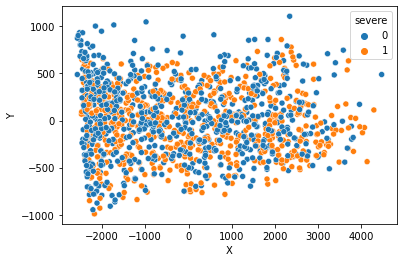

In [21]:
small_low_X = low_X[::5]
sns.scatterplot(data = small_low_X, x = 'X', y = 'Y', hue = 'severe')

<AxesSubplot:xlabel='X', ylabel='Y'>

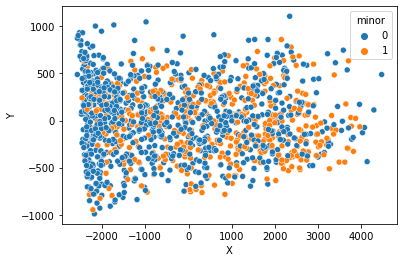

In [22]:
small_low_X = low_X[::5]
sns.scatterplot(data = small_low_X, x = 'X', y = 'Y', hue = 'minor')

In [23]:
data['MIN']

0       15.9
1       21.8
2       12.9
3       14.2
4       22.8
        ... 
6588    21.8
6589    36.0
6590    13.3
6591    16.0
6592    33.0
Name: MIN, Length: 6593, dtype: float64

In [24]:
data.columns

Index(['PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'E_OFF_RATING', 'OFF_RATING',
       'sp_work_OFF_RATING', 'E_DEF_RATING', 'DEF_RATING',
       'sp_work_DEF_RATING', 'E_NET_RATING', 'NET_RATING',
       'sp_work_NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT',
       'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'E_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'USG_PCT', 'E_USG_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'sp_work_PACE',
       'PIE', 'POSS', 'FGM', 'FGA', 'FGM_PG', 'FGA_PG', 'FG_PCT', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'E_OFF_RATING_RANK',
       'OFF_RATING_RANK', 'sp_work_OFF_RATING_RANK', 'E_DEF_RATING_RANK',
       'DEF_RATING_RANK', 'sp_work_DEF_RATING_RANK', 'E_NET_RATING_RANK',
       'NET_RATING_RANK', 'sp_work_NET_RATING_RANK', 'AST_PCT_RANK',
       'AST_TO_RANK', 'AST_RATIO_RANK', 'OREB_PCT_RANK', 'DREB_PCT_RANK',
       'REB_PCT_RANK', 'TM_TOV_PCT_RANK', 'E_TOV_PCT_

In [25]:
data_bench = data[['PLAYER_NAME', 'TEAM_ID', 'AGE', 'MIN', 'SEVERE_INJURY', 'MINOR_INJURY']]
data_bench['SEVERE_INJURY'] = data_bench['SEVERE_INJURY'].apply(convert_to_num)
data_bench['MINOR_INJURY'] = data_bench['MINOR_INJURY'].apply(convert_to_num)

<ipython-input-25-cbb5f9d13806>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bench['SEVERE_INJURY'] = data_bench['SEVERE_INJURY'].apply(convert_to_num)
<ipython-input-25-cbb5f9d13806>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bench['MINOR_INJURY'] = data_bench['MINOR_INJURY'].apply(convert_to_num)


In [26]:
data_bench.head()

,PLAYER_NAME,TEAM_ID,AGE,MIN,SEVERE_INJURY,MINOR_INJURY
0,AJ Price,1610612754,24.0,15.9,1,0
1,Aaron Brooks,1610612756,26.0,21.8,1,0
2,Aaron Gray,1610612740,26.0,12.9,1,0
3,Acie Law,1610612744,26.0,14.2,1,0
4,Al Harrington,1610612743,31.0,22.8,1,0


<AxesSubplot:xlabel='AGE', ylabel='MIN'>

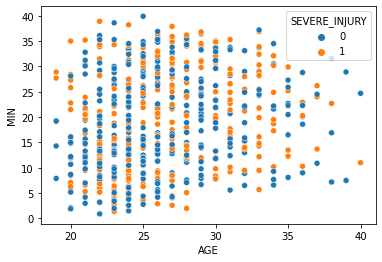

In [27]:
small_bench = data_bench[::10]
sns.scatterplot(data = small_bench, x = 'AGE', y = 'MIN', hue = 'SEVERE_INJURY')

<AxesSubplot:xlabel='AGE', ylabel='MIN'>

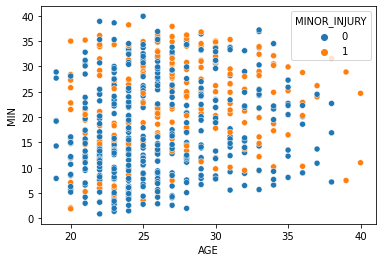

In [28]:
sns.scatterplot(data = small_bench, x = 'AGE', y = 'MIN', hue = 'MINOR_INJURY')

In [29]:
data.head()

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,sp_work_PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,SEASON_YEAR,SEVERE_INJURY,MINOR_INJURY
0,201985,AJ Price,AJ,1610612754,IND,24.0,50,22,28,0.440,...,153,278,270,240,253,210,408,2010,True,False
1,201166,Aaron Brooks,Aaron,1610612756,PHX,26.0,59,26,33,0.441,...,133,259,179,143,151,109,390,2010,True,False
2,201189,Aaron Gray,Aaron,1610612740,NOH,26.0,41,21,20,0.512,...,420,332,338,361,347,378,23,2010,True,False
3,201151,Acie Law,Acie,1610612744,GSW,26.0,51,20,31,0.392,...,100,307,305,304,326,326,264,2010,True,False
4,1733,Al Harrington,Al,1610612743,DEN,31.0,73,45,28,0.616,...,50,258,130,112,141,119,319,2010,True,False


In [30]:

features = data[['AGE', 'GP', 'W_PCT', 'MIN', 'E_OFF_RATING', 'E_DEF_RATING', 'AST_PCT',
       'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'E_TOV_PCT',
       'USG_PCT', 'E_USG_PCT', 'PACE_PER40', 'PIE', 'POSS', 'FGA_PG',
       'FG_PCT']]

In [31]:
features.head()

,AGE,GP,W_PCT,MIN,E_OFF_RATING,E_DEF_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TOV_PCT,USG_PCT,E_USG_PCT,PACE_PER40,PIE,POSS,FGA_PG,FG_PCT
0,24.0,50,0.440,15.9,104.3,102.7,0.233,2.09,21.4,0.019,0.073,0.045,10.2,0.223,0.227,79.63,0.075,1579,6.4,0.356
1,26.0,59,0.441,21.8,105.9,112.5,0.289,2.35,23.9,0.015,0.046,0.030,10.1,0.251,0.257,80.01,0.078,2571,9.9,0.375
2,26.0,41,0.512,12.9,107.4,105.3,0.044,0.50,9.9,0.121,0.236,0.178,19.8,0.130,0.132,75.47,0.065,997,2.4,0.566
3,26.0,51,0.392,14.2,100.1,108.2,0.182,1.95,24.6,0.017,0.072,0.044,12.6,0.156,0.160,80.56,0.070,1460,3.6,0.435
4,31.0,73,0.616,22.8,110.3,106.7,0.096,0.95,10.8,0.047,0.157,0.102,11.4,0.219,0.221,81.80,0.078,3389,9.2,0.416


In [32]:
labels = pd.read_csv('https://raw.githubusercontent.com/COGS118A/Group014-Wi23/main/nba_api_merged_injuries').iloc[:,-2:]
labels = labels.fillna(False)
labels['INJ'] = (labels['SEVERE_INJURY'] | labels['MINOR_INJURY'])
labels = labels[['INJ']]
labels = np.ravel(labels.values)
print(labels)

[ True  True  True ... False False False]


In [33]:
pca = PCA(n_components = 2)
pca.fit(features)

low_X = pca.transform(features)
low_X.shape

(6593, 2)

In [34]:
low_X = pd.DataFrame(low_X)
low_X.head()

low_X.columns = ['X', 'Y']
low_X.head()



,X,Y
0,-687.806182,10.207400
1,304.249818,3.989605
2,-1269.891999,9.845194
3,-806.803035,12.192027
4,1122.351795,9.937433


In [40]:
y.head()

,0
0,True
1,True
2,True
3,True
4,True


In [44]:
y = pd.DataFrame(labels)
plotting = pd.merge(low_X, y, left_index = True, right_index = True)
plotting.columns = ['X', 'Y', 'Label']
plotting.head()

,X,Y,Label
0,-687.806182,10.207400,True
1,304.249818,3.989605,True
2,-1269.891999,9.845194,True
3,-806.803035,12.192027,True
4,1122.351795,9.937433,True


<AxesSubplot:xlabel='X', ylabel='Y'>

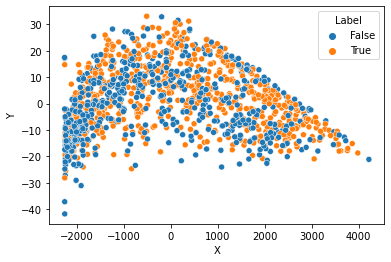

In [47]:
small_low_X = plotting[::5]
sns.scatterplot(data = small_low_X, x = 'X', y = 'Y', hue = 'Label')